http://mmnet.iis.sinica.edu.tw/dl/wowah/

https://www.kaggle.com/mylesoneill/warcraft-avatar-history

In [1]:
import pandas as pd
import numpy as np
import os
import math
% matplotlib inline

In [2]:
dirname = 'Data/wowah/output/'      # Adjust to your dir as needed.
filename = 'wowah_data2.csv'
filepath = os.path.join(dirname, filename)

In [3]:
df = pd.read_csv(filepath)

In [4]:
df.head()

,char,level,race,charclass,zone,guild,timestamp,sample_idx
0,0,5,Orc,Warrior,Durotar,-1,12/31/05 23:59:46,1
1,1,9,Orc,Shaman,Durotar,-1,12/31/05 23:59:46,1
2,2,13,Orc,Shaman,Durotar,-1,12/31/05 23:59:52,1
3,3,14,Orc,Warrior,Durotar,0,12/31/05 23:59:52,1
4,4,14,Orc,Shaman,Durotar,-1,12/31/05 23:59:52,1


### drop records beyond 2008-10-01

In [5]:
def isafter20081001(tt):
    return (int(tt[6:8])==8 and int(tt[:2])>=10) or int(tt[6:8])>8

df['isafter20081001'] = df.timestamp.apply(isafter20081001)

In [6]:
df = df[df.isafter20081001==False]

In [7]:
df.drop('isafter20081001', axis=1, inplace=True)
df.tail()

,char,level,race,charclass,zone,guild,timestamp,sample_idx
33975320,44730,70,Blood Elf,Mage,Eye of the Storm,101,09/30/08 23:57:49,-142
33975321,55051,70,Blood Elf,Mage,Serpentshrine Cavern,103,09/30/08 23:57:49,-142
33975322,67862,70,Blood Elf,Mage,Terokkar Forest,205,09/30/08 23:57:49,-142
33975323,69475,70,Blood Elf,Mage,The Shattered Halls,101,09/30/08 23:57:49,-142
33975324,66019,70,Blood Elf,Mage,Netherstorm,282,09/30/08 23:57:49,-142


### convert timestamp to pandas datetime format

In [8]:
def to_datetime(tt):
    return pd.to_datetime(tt, format='%m/%d/%y %H:%M:%S')

df['datetime'] = df.timestamp.apply(to_datetime)
df.drop('timestamp', axis=1, inplace = True)
df.head()

,char,level,race,charclass,zone,guild,sample_idx,datetime
0,0,5,Orc,Warrior,Durotar,-1,1,2005-12-31 23:59:46
1,1,9,Orc,Shaman,Durotar,-1,1,2005-12-31 23:59:46
2,2,13,Orc,Shaman,Durotar,-1,1,2005-12-31 23:59:52
3,3,14,Orc,Warrior,Durotar,0,1,2005-12-31 23:59:52
4,4,14,Orc,Shaman,Durotar,-1,1,2005-12-31 23:59:52


https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html

In [9]:
df.datetime[:10].dt.dayofweek

0    5
1    5
2    5
3    5
4    5
5    5
6    5
7    5
8    5
9    5
Name: datetime, dtype: int64

# play time per avatar

In [10]:
total_hour_per_char = pd.DataFrame(df.groupby(by='char').char.count()/6.0)

In [11]:
total_hour_per_char.columns = ['hours',]
total_hour_per_char.index.names = ['char']
total_hour_per_char.head()

,hours
char,
0,12.666667
1,3.166667
2,31.833333
3,18.166667
4,12.666667


In [12]:
total_hour_per_char.describe()

,hours
count,78172.000000
mean,72.437115
std,308.239326
min,0.166667
25%,0.333333
50%,1.333333
75%,10.333333
max,21324.333333


In [13]:
total_hour_per_char.hours.quantile(q=[0.75,0.8,0.85,0.9,0.95])

0.75     10.333333
0.80     18.333333
0.85     37.666667
0.90    103.500000
0.95    398.075000
Name: hours, dtype: float64

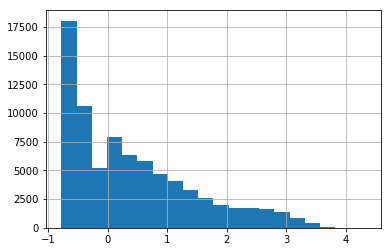

In [14]:
total_hour_per_char.loghours = np.log10(total_hour_per_char.hours)
total_hour_per_char.loghours.hist(bins=20)

# race and class

In [15]:
len(df.char.unique()) # number of avatars

78172

In [16]:
unique_avatars = df.drop_duplicates('char')
unique_avatars.head()

,char,level,race,charclass,zone,guild,sample_idx,datetime
0,0,5,Orc,Warrior,Durotar,-1,1,2005-12-31 23:59:46
1,1,9,Orc,Shaman,Durotar,-1,1,2005-12-31 23:59:46
2,2,13,Orc,Shaman,Durotar,-1,1,2005-12-31 23:59:52
3,3,14,Orc,Warrior,Durotar,0,1,2005-12-31 23:59:52
4,4,14,Orc,Shaman,Durotar,-1,1,2005-12-31 23:59:52


##### races by number of avatar creations

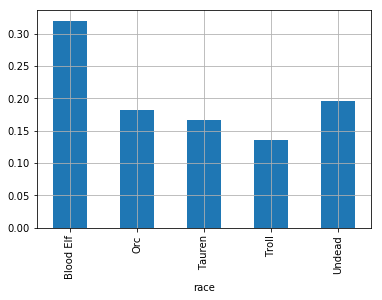

In [17]:
race_group = unique_avatars.groupby(by='race').race.count()
race_group = race_group/race_group.sum()
race_group.plot.bar(grid=True)

#### races by appearance in game

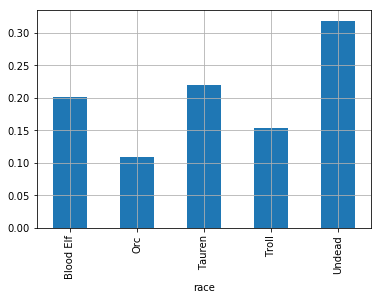

In [18]:
race_group = df.groupby(by='race').race.count()
race_group = race_group/race_group.sum()
race_group.plot.bar(grid=True)

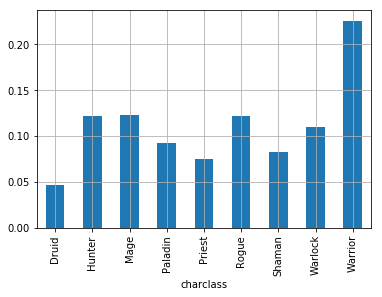

In [19]:
class_group = unique_avatars.groupby(by='charclass').race.count()
class_group = class_group/class_group.sum()
class_group.plot.bar(grid=True)

In [20]:
df.charclass.unique()

array(['Warrior', 'Shaman', 'Hunter', 'Warlock', 'Rogue', 'Druid', 'Mage',
       'Priest', 'Paladin'], dtype=object)